In [13]:
import time

import numpy as np
import pandas as pd
import matplotlib. pyplot as plt

from okama.assets import Asset, AssetList, Portfolio
from okama.frontier import EfficientFrontier, EfficientFrontierReb, Plots
from okama.helpers import Rebalance, Frame, Float

pd.options.display.float_format = '{:,.4f}'.format

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2 Assets

In [14]:
ef = EfficientFrontierReb(symbols=['SPY.US', 'GLD.US'])
df = ef.get_monte_carlo(n=100)

Total time taken is 0.16 min.


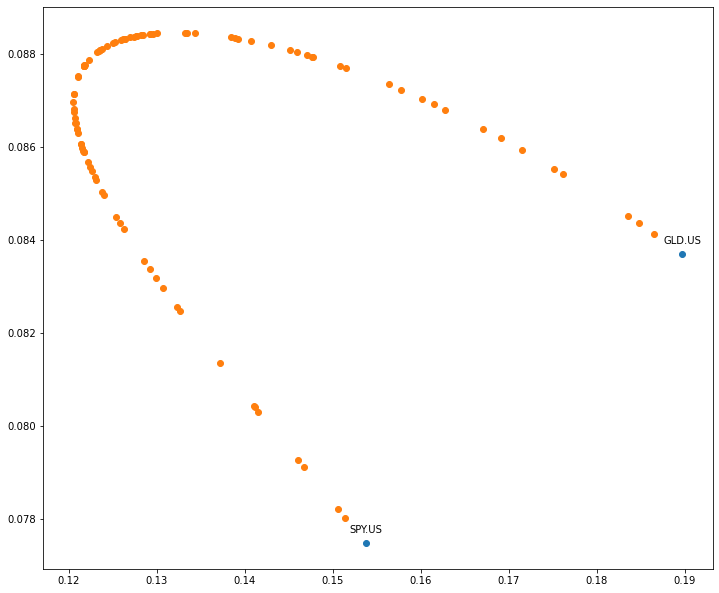

In [52]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
Plots(['SPY.US', 'GLD.US']).plot_assets(type='cagr')
ax = plt.gca()
ax.scatter(df.Risk, df.CAGR)

In [53]:
ef = EfficientFrontierReb(symbols=['SPY.US', 'GLD.US'], period='N')
df = ef.get_monte_carlo(n=100)

Total time taken is 0.01 min.


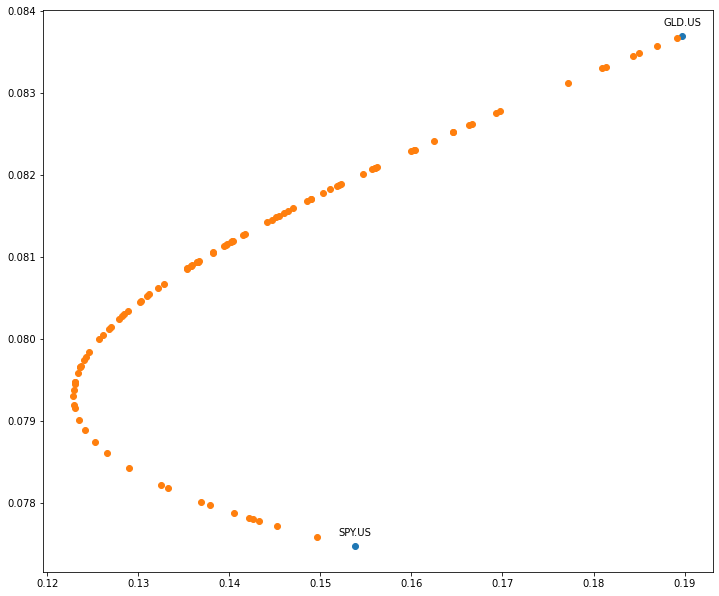

In [54]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
Plots(['SPY.US', 'GLD.US']).plot_assets(type='cagr')
ax = plt.gca()
ax.scatter(df.Risk, df.CAGR)

In [12]:
ef = EfficientFrontierReb(symbols=['SPY.US', 'VNQ.US'])
df = ef.get_monte_carlo(n=1000)

Total time taken is 1.31 min.


In [13]:
points = Plots(['SPY.US', 'VNQ.US'])

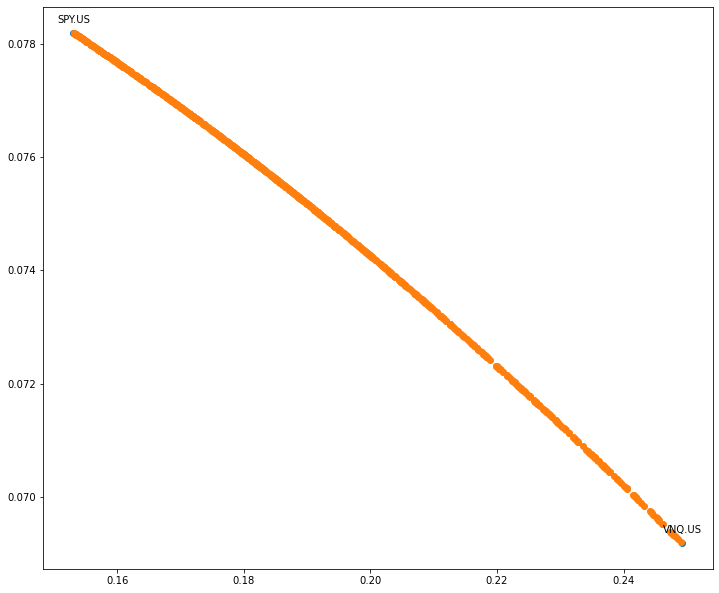

In [14]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
points.plot_assets(type='cagr')
ax = plt.gca()
ax.scatter(df.Risk, df.CAGR)

### N Assets

In [25]:
ls = ['SPY.US', 'GLD.US', 'BND.US']
ef = EfficientFrontierReb(ls, curr='USD', n=5)
df = ef.get_monte_carlo(n=1000)
points = Plots(ls, curr='USD')

Total time taken is 1.49 min.


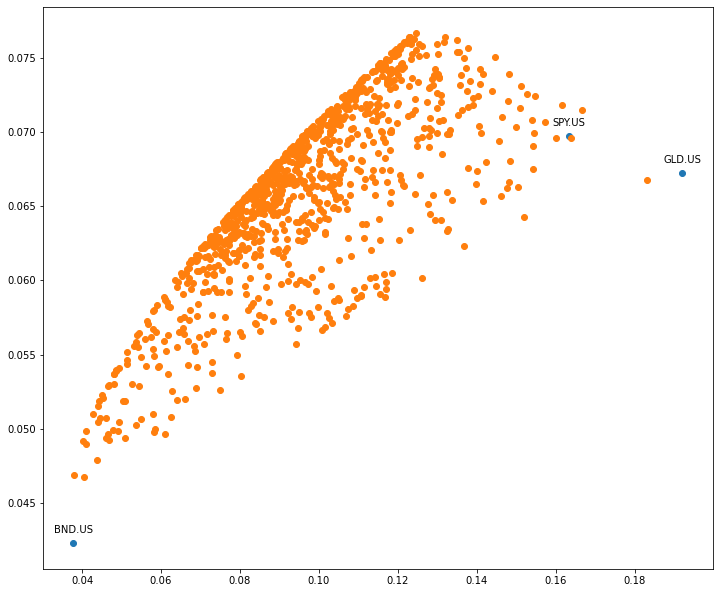

In [28]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
points.plot_assets(type='cagr')
ax = plt.gca()
ax.scatter(df.Risk, df.CAGR)

In [8]:
ls = ['SPY.US', 'EFA.US', 'IEMG.US']
ef = EfficientFrontierReb(ls, n=5)

In [9]:
df = ef.get_monte_carlo(n=1000)

Total time taken is 0.81 min.


In [10]:
points = Plots(ls)

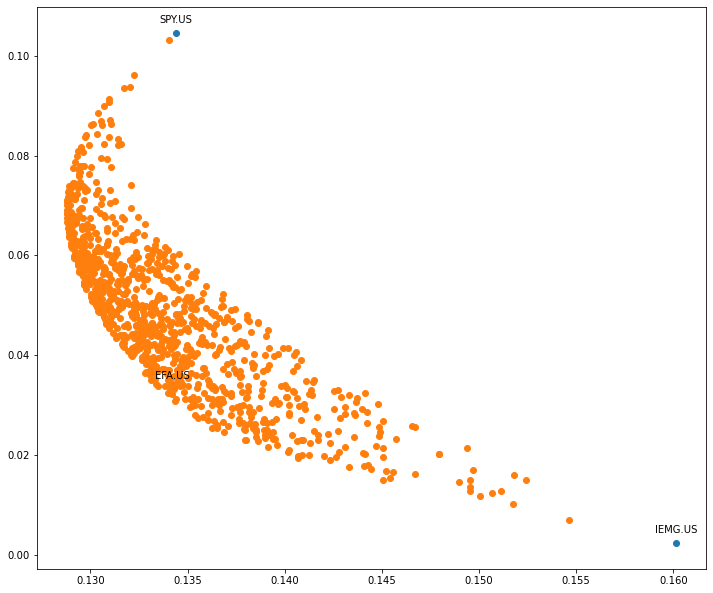

In [11]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
points.plot_assets(type='cagr')
ax = plt.gca()
ax.scatter(df.Risk, df.CAGR)

In [15]:
ls = ['SPY.US', 'GLD.US', '0890-94127385.RUFUND']
ef = EfficientFrontierReb(ls, n=5)
df = ef.get_monte_carlo(n=1000)
points = Plots(ls)

Total time taken is 1.35 min.


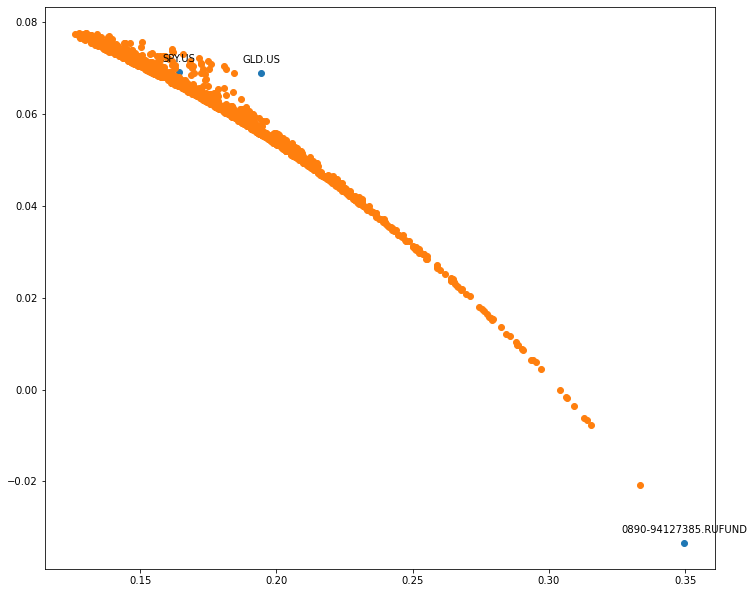

In [16]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
points.plot_assets(type='cagr')
ax = plt.gca()
ax.scatter(df.Risk, df.CAGR)

In [17]:
ls = ['SPY.US', 'GLD.US', '0890-94127385.RUFUND']
ef = EfficientFrontierReb(ls, n=5, curr='RUB')
df = ef.get_monte_carlo(n=1000)
points = Plots(ls, curr='RUB')

Total time taken is 1.15 min.


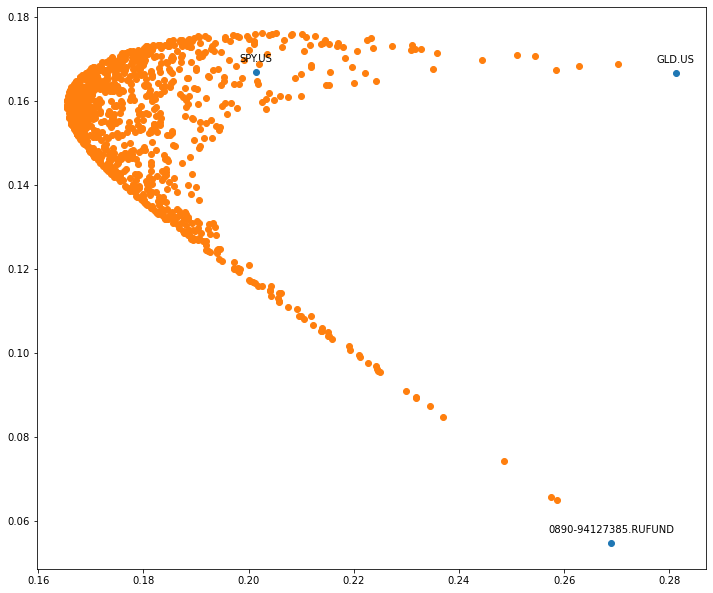

In [20]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
points.plot_assets(type='cagr')
ax = plt.gca()
ax.scatter(df.Risk, df.CAGR)

In [22]:
ls = ['SPY.US', 'GLD.US', '0890-94127385.RUFUND', '0165-70287767.RUFUND']
ef = EfficientFrontierReb(ls, n=5, curr='RUB')
df = ef.get_monte_carlo(n=1000)
points = Plots(ls, curr='RUB')

Total time taken is 1.31 min.


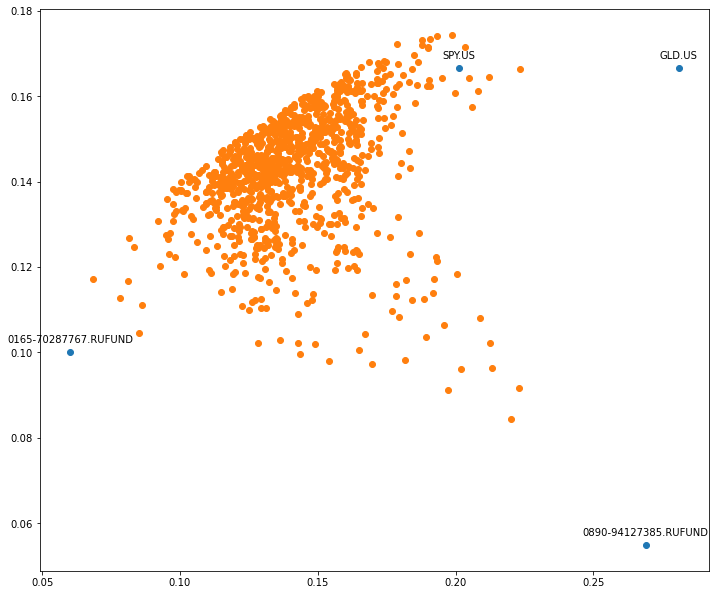

In [23]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
points.plot_assets(type='cagr')
ax = plt.gca()
ax.scatter(df.Risk, df.CAGR)

### Monte Catlo method elaboration

In [45]:
# Set Seed for reproducibility
np.random.seed(0)

# Set your n

assets_number = 2  # number of assets
n = 100  # number of points
rand_nos = np.random.rand(n, assets_number)
weights = rand_nos.transpose() / rand_nos.sum(axis=1)
weights = weights.transpose()

In [46]:
weights

array([[0.43418691, 0.56581309],
       [0.52521691, 0.47478309],
       [0.39610605, 0.60389395],
       [0.32917129, 0.67082871],
       [0.7153587 , 0.2846413 ],
       [0.59951013, 0.40048987],
       [0.38030858, 0.61969142],
       [0.44912526, 0.55087474],
       [0.02370719, 0.97629281],
       [0.47213411, 0.52786589],
       [0.55047309, 0.44952691],
       [0.37155893, 0.62844107],
       [0.15599464, 0.84400536],
       [0.13175585, 0.86824415],
       [0.55722649, 0.44277351],
       [0.25467687, 0.74532313],
       [0.44520528, 0.55479472],
       [0.02952397, 0.97047603],
       [0.49803167, 0.50196833],
       [0.58056498, 0.41943502],
       [0.45133699, 0.54866301],
       [0.92053184, 0.07946816],
       [0.49855274, 0.50144726],
       [0.62003262, 0.37996738],
       [0.46445322, 0.53554678],
       [0.56522377, 0.43477623],
       [0.90641685, 0.09358315],
       [0.56424771, 0.43575229],
       [0.72055205, 0.27944795],
       [0.65609528, 0.34390472],
       [0.

In [48]:
df = pd.DataFrame(weights)

In [49]:
df

,0,1
0,0.4342,0.5658
1,0.5252,0.4748
2,0.3961,0.6039
3,0.3292,0.6708
4,0.7154,0.2846
...,...,...
95,0.6549,0.3451
96,0.1647,0.8353
97,0.6013,0.3987
98,0.4720,0.5280


In [123]:
df = df.aggregate(np.array, axis=1)

In [125]:
df.iloc[0]

array([0.43418691, 0.56581309])

In [108]:
df = df.aggregate(list, axis=1)

In [109]:
df

0      [0.4341869127221046, 0.5658130872778954]
1      [0.5252169069899552, 0.4747830930100448]
2      [0.3961060540803576, 0.6038939459196424]
3     [0.32917128653159566, 0.6708287134684043]
4     [0.7153586959003677, 0.28464130409963234]
                        ...                    
95     [0.6548990418241223, 0.3451009581758777]
96    [0.16469016879647147, 0.8353098312035286]
97     [0.6012561144600569, 0.3987438855399431]
98     [0.4720387407503516, 0.5279612592496484]
99     [0.1178386778555579, 0.8821613221444421]
Length: 100, dtype: object

In [6]:
assets = AssetList(['SPY.US', 'GLD.US'])

In [95]:
portfolios = df.aggregate(Rebalance.rebalanced_portfolio_return_ts, ror=assets.ror, period='Y')

In [96]:
portfolios.shape[0]

100

In [97]:
for index, data in portfolios.iterrows():
    if index == 0:
        df = pd.DataFrame()
    risk_monthly = data.std()
    mean_return = data.mean()
    risk = Float.annualize_risk(risk_monthly, mean_return)
    cagr = Frame.get_cagr(data)
    
    row = {
        'Risk': risk,
        'CAGR': cagr
    } 
    
    df = df.append(row, ignore_index=True)

In [98]:
df

,CAGR,Risk
0,0.0823,0.1309
1,0.0811,0.1267
2,0.0827,0.1337
3,0.0830,0.1400
4,0.0770,0.1303
...,...,...
95,0.0786,0.1273
96,0.0827,0.1614
97,0.0798,0.1261
98,0.0819,0.1287


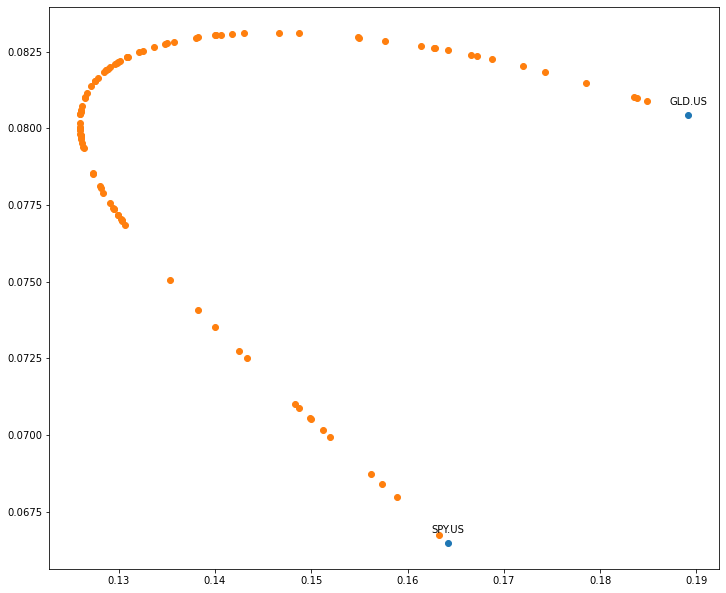

In [101]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
Plots(['SPY.US', 'GLD.US']).plot_assets(type='cagr')
ax = plt.gca()
ax.scatter(df.Risk, df.CAGR)
# ax.plot(df.Risk, df.CAGR)